# Projeto de visualização de dados

Este notebook será dedicado para a análise e visualização de dados de uma base de uma campanha de marketing.  
O link para a base no [Kaggle](https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking)

Será realizada uma análise exploratória dos dados e uma análise a fim de encontrar relações entre os dados apresentados, realizar comparações e ranqueamentos.

In [2]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Importação da base de dados
campanha = pd.read_csv('./Data/KAG_conversion_data.csv', header=0)

In [6]:
campanha.head() # Primeira visualização da base

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Step 1: Análise exploratória de dados

In [9]:
print(campanha.info())
print(campanha.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None
ad_id                  False
xyz_campaign_id        False
fb_campaign_id         False
age                    False
gender                 False
interest               False
I

Não temos dados vazios, o que é ótimo!

In [13]:
#Contando os valores únicos em cada coluna
for coluna in campanha.columns:
    print(campanha[coluna].value_counts())

708746     1
1121593    1
1121602    1
1121601    1
1121599    1
          ..
781353     1
781354     1
781438     1
781470     1
1314415    1
Name: ad_id, Length: 1143, dtype: int64
1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64
144536    6
144562    6
144599    6
144636    6
144611    6
         ..
115866    1
115870    1
115876    1
115878    1
179982    1
Name: fb_campaign_id, Length: 691, dtype: int64
30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64
16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
32      33
22      33
19      32
25      26
31      25
30      25
2       25
7       24
24      24
23      23
36      21
65      19
66      11
107      8
110      8
102      7
105      7
101      7
112      7
108      7
100      6
111      6
113      6
109      6
103      5
114      5
104      5
106      5
Name

Certo pelo que podemos ver, existem vários valores repetidos, porém nem todos serão interessantes para essa análise.  
Existem uma colunas porém que são bem interessantes: xyz_campaign_id, que podemos utilizar para tirar algumas inferências interessantes.

## Step 2: Analisando a performance de cada campanha

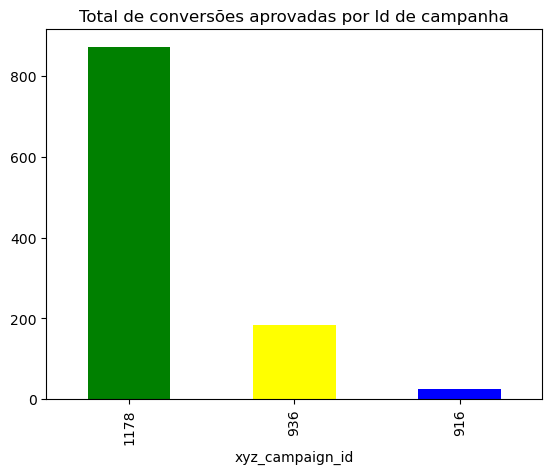

In [17]:
#Visualização do total de conversões aprovadas de cada campanha
total_conversoes_aprovadas = campanha.groupby('xyz_campaign_id')['Approved_Conversion'].sum()
total_conversoes_aprovadas_ordenado = total_conversoes_aprovadas.sort_values(ascending = False)
total_conversoes_aprovadas_ordenado.plot(kind='bar', color = ['green','yellow','blue'], title = 'Total de conversões aprovadas por Id de campanha')
plt.show()

Pode-se perceber que a campanha com o maior número de conversões é a de ID "1178" e a menor é a de ID "916"

## Step 3: Analisando a proporção de conversões e conversões aprovadas

Total de conversões por campanha xyz_campaign_id
916       58
936      537
1178    2669
Name: Total_Conversion, dtype: int64
Total de conversões aprovadas por campanha xyz_campaign_id
916      24
936     183
1178    872
Name: Approved_Conversion, dtype: int64
[34, 24]


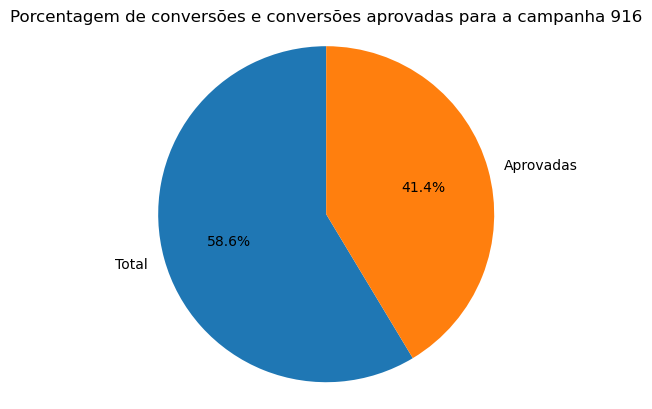

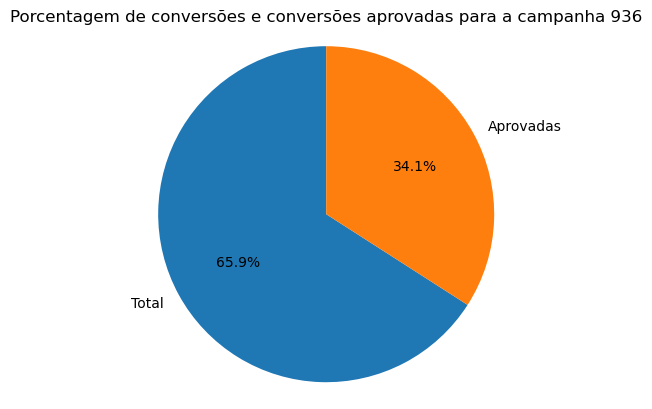

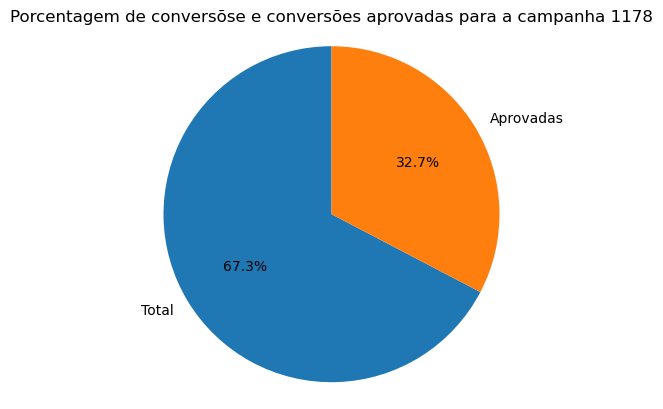

In [21]:
total_conversoes = campanha.groupby('xyz_campaign_id')['Total_Conversion'].sum()
print(f'Total de conversões por campanha {total_conversoes}')
print(f'Total de conversões aprovadas por campanha {total_conversoes_aprovadas}')

parcelas = ['Total', 'Aprovadas']
#Parcelas Campanha 916
parcela_916 = []
parcela_916.append(total_conversoes[916] - total_conversoes_aprovadas[916]) #Criando a parcela de conversões totais para a campanha, nesse caso 58 conversões totais apenas 24 foram aprovadas, então a parcela será 58 - 24 = 34
parcela_916.append(total_conversoes_aprovadas[916])
print(parcela_916)

#Parcelas Campanha 936
parcela_936 = []
parcela_936.append(total_conversoes[936] - total_conversoes_aprovadas[936])
parcela_936.append(total_conversoes_aprovadas[936])

#Parcelas Campanha 1178
parcela_1178 = []
parcela_1178.append(total_conversoes[1178] - total_conversoes_aprovadas[1178])
parcela_1178.append(total_conversoes_aprovadas[1178])

#Criando o gráfico de pizza para a campanha 916
fig, ax = plt.subplots()
ax.pie(parcela_916, labels=parcelas, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Porcentagem de conversões e conversões aprovadas para a campanha 916')

plt.show()

#Gráfico de pizza para a campanha 936
fig, ax = plt.subplots()
ax.pie(parcela_936, labels=parcelas,autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Porcentagem de conversões e conversões aprovadas para a campanha 936')

plt.show()

#Gráfico de pizza para a campanha 1178
fig, ax = plt.subplots()
ax.pie(parcela_1178,labels=parcelas,autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Porcentagem de conversõse e conversões aprovadas para a campanha 1178')

plt.show()

Pode-se concluir que que a campanha 916, apesar de ter a menor quantidade de conversões aprovadas, proporcionalmente possui com relação ao total de conversões, ela possui uma proporção de conversões aprovadas maior que o de outras campanhas.

## Step 3: Relacionando interesses e conversões

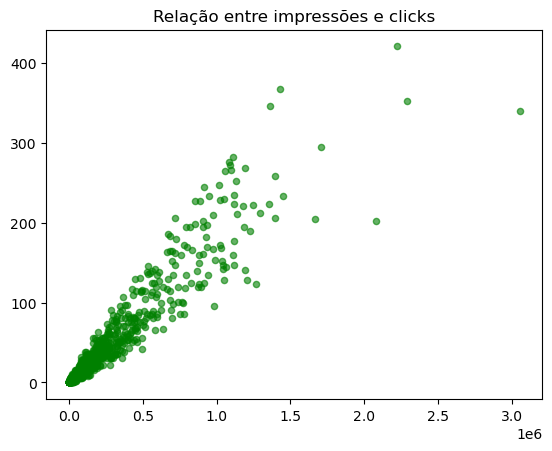

In [23]:
x_data = campanha['Impressions']
y_data = campanha['Clicks']
plt.scatter(x_data,y_data, color='green',marker='o',s=20,alpha=0.6)
plt.title('Relação entre impressões e clicks')
plt.show()